In [1]:
import numpy as np
import pandas as pd

In [2]:
url = r'https://lazyprogrammer.me/course_files/spam.csv'
storage_options = {'User-Agent': 'Mozilla/5.0'}
df = pd.read_csv(url, storage_options=storage_options, encoding = "ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#dropping unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['Labels', 'Data']
df.head()

,Labels,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['bin_rep'] = df['Labels'].map({'ham' : 0, 'spam': 1})
Y = df['bin_rep'].values
df

,Labels,Data,bin_rep
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df['Data'], Y, test_size=0.33)
print(f'Shape of X_train : {X_train.shape}\nShape of X_test : {X_test.shape}')

Shape of X_train : (3733,)
Shape of X_test : (1839,)


In [16]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu, True)

[]

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [12]:
word2index = tokenizer.word_index
V =  len(word2index)
print(f'Found {V} unique tokens')

Found 7236 unique tokens


In [14]:
#padding the sequences to get a NxT matrix
data_train = pad_sequences(sequences_train)
print(f'Shape of Training data = {data_train.shape}')

T= data_train.shape[1]

Shape of Training data = (3733, 162)


In [15]:
#padding the sequences 
data_test = pad_sequences(sequences_test, maxlen=T)  
#!!!!!!!max len is very important to add...else data_train and data_test will be of diff shapes and model wont fit
print(f'Shape of Testing data = {data_test.shape}')

Shape of Testing data = (1839, 162)


In [20]:
from keras.layers import Input, Dense, LSTM, GlobalMaxPool1D, Embedding
from keras.models import Model

D = 20
M = 15

#we want the size of Embedding to be (V + 1) x D 
#since the first index starts from 1 and not 0

i = Input(shape = (T,))
x = Embedding(V + 1, D) (i)
x = LSTM(M, return_sequences = True) (x)
x = GlobalMaxPool1D() (x)
x = Dense(1, activation = 'sigmoid') (x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 162)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 162, 20)           144740    
                                                                 
 lstm_2 (LSTM)               (None, 162, 15)           2160      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 146,916
Trainable params: 146,916
Non-trainable params: 0
_____________________________________________________

In [23]:
model.compile(
	loss='binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

r = model.fit(
	data_train,
    Y_train,
    validation_data=(data_test, Y_test),
    epochs = 10
)

Epoch 1/10
117/117 [==============================] - 7s 46ms/step - loss: 0.4684 - accuracy: 0.8470 - val_loss: 0.3738 - val_accuracy: 0.8624
Epoch 2/10
117/117 [==============================] - 5s 42ms/step - loss: 0.2875 - accuracy: 0.8677 - val_loss: 0.2371 - val_accuracy: 0.8624
Epoch 3/10
117/117 [==============================] - 5s 43ms/step - loss: 0.1957 - accuracy: 0.8749 - val_loss: 0.1779 - val_accuracy: 0.9554
Epoch 4/10
117/117 [==============================] - 5s 43ms/step - loss: 0.1349 - accuracy: 0.9879 - val_loss: 0.1224 - val_accuracy: 0.9902
Epoch 5/10
117/117 [==============================] - 5s 43ms/step - loss: 0.0804 - accuracy: 0.9973 - val_loss: 0.0922 - val_accuracy: 0.9831
Epoch 6/10
117/117 [==============================] - 5s 43ms/step - loss: 0.0551 - accuracy: 0.9979 - val_loss: 0.0717 - val_accuracy: 0.9897
Epoch 7/10
117/117 [==============================] - 5s 43ms/step - loss: 0.0397 - accuracy: 0.9989 - val_loss: 0.0654 - val_accuracy: 0.9886

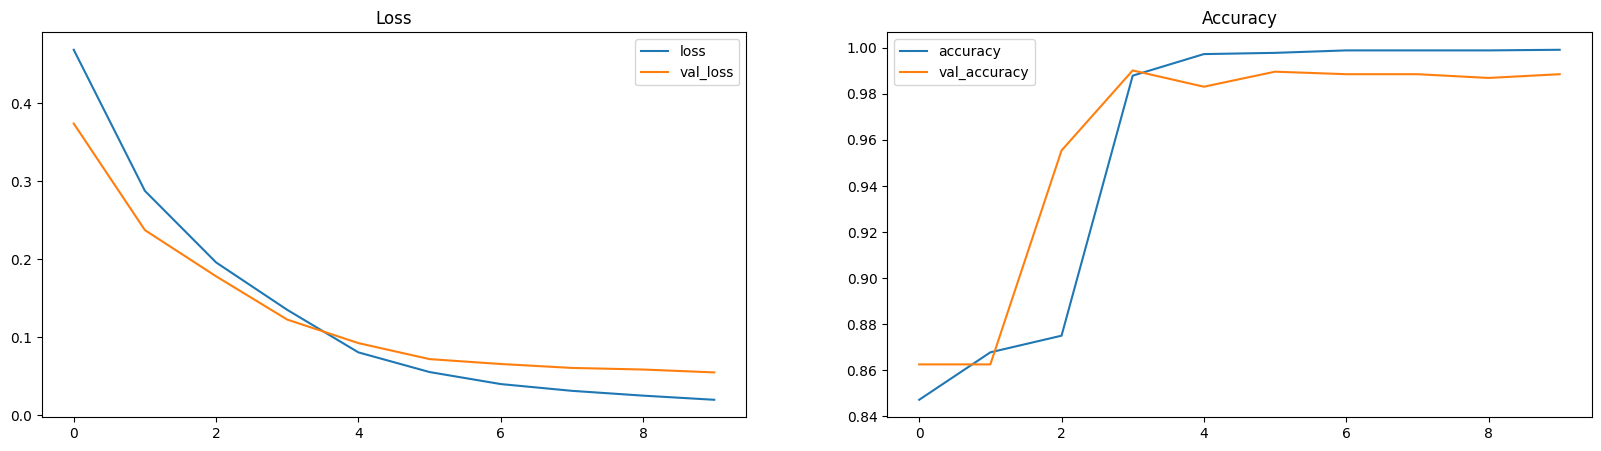

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols =2, figsize= (20, 5))

ax[0].plot(r.history['loss'], label = 'loss')
ax[0].plot(r.history['val_loss'], label = 'val_loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(r.history['accuracy'], label = 'accuracy')
ax[1].plot(r.history['val_accuracy'], label = 'val_accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend()

plt.show()

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues) :
    """
    This function prints and plots the confusion matrix
    """
    if normalize :
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized Confusion matrix')
    else:
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()

58/58 [==============================] - 1s 10ms/step
[[1582   17]
 [   4  236]]


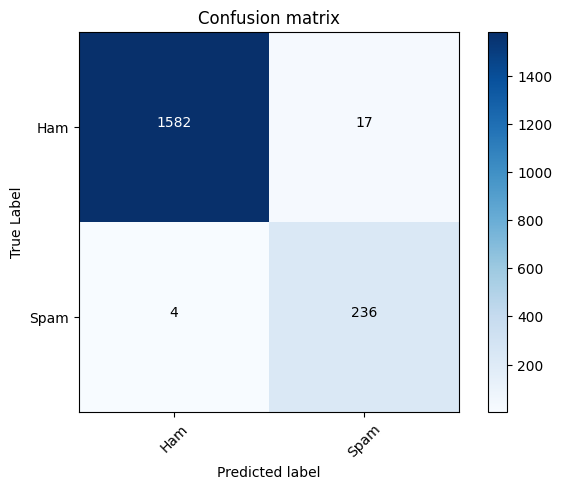

In [27]:
P_test = np.round(model.predict(data_test))
cm = confusion_matrix(P_test, Y_test)
plot_confusion_matrix(cm, ['Ham', 'Spam'], normalize=False)